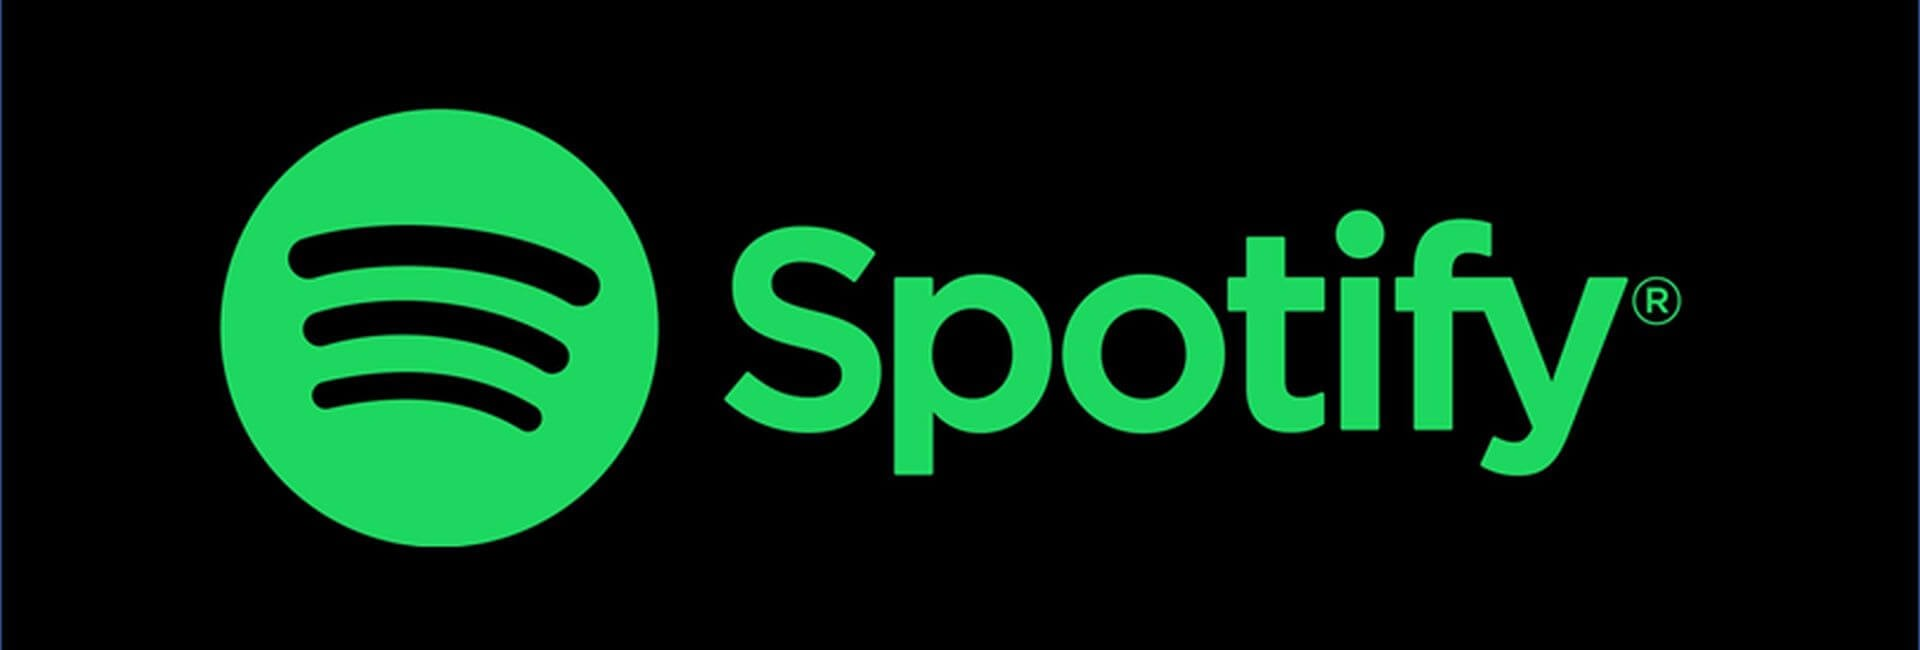

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import squarify
import warnings
import ipywidgets as widgets
from IPython.display import display
from ipywidgets import interact, interactive, fixed, interact_manual
warnings.filterwarnings('ignore')

## Read Data File

In [2]:
filename = "spotify_data.csv"
def get_data(filename):
    missing_values = ["n/a", "na", "--", " ", "N/A", "NA"]
    return pd.read_csv(filename,na_values = missing_values,sep=",")
originalDF = get_data(filename)
df = originalDF.copy()
df.head()

,Unnamed: 0,artist_name,track_name,track_id,popularity,year,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0,Jason Mraz,I Won't Give Up,53QF56cjZA9RTuuMZDrSA6,68,2012,acoustic,0.483,0.303,4,-10.058,1,0.0429,0.6940,0.000000,0.1150,0.139,133.406,240166,3
1,1,Jason Mraz,93 Million Miles,1s8tP3jP4GZcyHDsjvw218,50,2012,acoustic,0.572,0.454,3,-10.286,1,0.0258,0.4770,0.000014,0.0974,0.515,140.182,216387,4
2,2,Joshua Hyslop,Do Not Let Me Go,7BRCa8MPiyuvr2VU3O9W0F,57,2012,acoustic,0.409,0.234,3,-13.711,1,0.0323,0.3380,0.000050,0.0895,0.145,139.832,158960,4
3,3,Boyce Avenue,Fast Car,63wsZUhUZLlh1OsyrZq7sz,58,2012,acoustic,0.392,0.251,10,-9.845,1,0.0363,0.8070,0.000000,0.0797,0.508,204.961,304293,4
4,4,Andrew Belle,Sky's Still Blue,6nXIYClvJAfi6ujLiKqEq8,54,2012,acoustic,0.430,0.791,6,-5.419,0,0.0302,0.0726,0.019300,0.1100,0.217,171.864,244320,4


## Data Cleaning

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 20 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   Unnamed: 0        1048575 non-null  int64  
 1   artist_name       1048560 non-null  object 
 2   track_name        1048574 non-null  object 
 3   track_id          1048575 non-null  object 
 4   popularity        1048575 non-null  int64  
 5   year              1048575 non-null  int64  
 6   genre             1048575 non-null  object 
 7   danceability      1048575 non-null  float64
 8   energy            1048575 non-null  float64
 9   key               1048575 non-null  int64  
 10  loudness          1048575 non-null  float64
 11  mode              1048575 non-null  int64  
 12  speechiness       1048575 non-null  float64
 13  acousticness      1048575 non-null  float64
 14  instrumentalness  1048575 non-null  float64
 15  liveness          1048575 non-null  float64
 16  

In [4]:
df.shape

(1048575, 20)

### Drop Unnecessary columns --> "unnamed : 0 "

In [5]:
df.drop('Unnamed: 0', axis=1, inplace=True)
df.head()

,artist_name,track_name,track_id,popularity,year,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,Jason Mraz,I Won't Give Up,53QF56cjZA9RTuuMZDrSA6,68,2012,acoustic,0.483,0.303,4,-10.058,1,0.0429,0.6940,0.000000,0.1150,0.139,133.406,240166,3
1,Jason Mraz,93 Million Miles,1s8tP3jP4GZcyHDsjvw218,50,2012,acoustic,0.572,0.454,3,-10.286,1,0.0258,0.4770,0.000014,0.0974,0.515,140.182,216387,4
2,Joshua Hyslop,Do Not Let Me Go,7BRCa8MPiyuvr2VU3O9W0F,57,2012,acoustic,0.409,0.234,3,-13.711,1,0.0323,0.3380,0.000050,0.0895,0.145,139.832,158960,4
3,Boyce Avenue,Fast Car,63wsZUhUZLlh1OsyrZq7sz,58,2012,acoustic,0.392,0.251,10,-9.845,1,0.0363,0.8070,0.000000,0.0797,0.508,204.961,304293,4
4,Andrew Belle,Sky's Still Blue,6nXIYClvJAfi6ujLiKqEq8,54,2012,acoustic,0.430,0.791,6,-5.419,0,0.0302,0.0726,0.019300,0.1100,0.217,171.864,244320,4


### Check for missing values

There is missing in data
        column  # of missings
0  artist_name             15
1   track_name              1


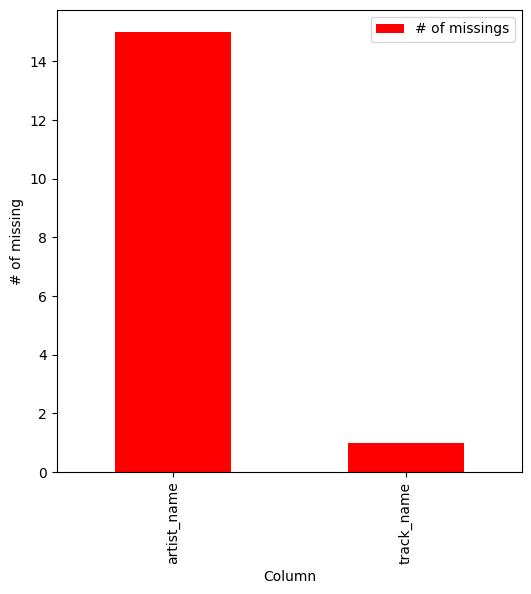

In [6]:
names = []
values = []
def check_missing(df):
    if df.isnull().values.any() :
        print("There is missing in data")
        return True
    else:
        print("Data has no missing values")
        return False

            

if(check_missing(df)):
    for col_name in df.columns:
        if df[col_name].isnull().any() :
            names.append(col_name)
            values.append(df[col_name].isnull().sum())
            
    missing = {"column":names,
              "# of missings":values}
    missingDf = pd.DataFrame(missing)
    print(missingDf)
    missingDf.plot.bar(x="column",y='# of missings', figsize=(6, 6),ylabel="# of missing",xlabel = "Column",color="red")

### Drop rows with missing values

In [7]:
df = df.dropna()
assert check_missing(df) == False

Data has no missing values


### Check if there is any duplicates in the unique columns : track_id

In [8]:
def check_duplicated(df, column_name):
    duplicates_in_unique_column = df[df.duplicated(column_name)]
    duplicates_count = duplicates_in_unique_column.shape[0]
    if((duplicates_count) == 0) :
        print("There is no duplicated values in " + column_name)
    else:
        print("There is {duplicates_count} duplicated values in " + column_name)
        
check_duplicated(df, "track_id")

There is no duplicated values in track_id


### Check that all values of the column has the same data type 

In [9]:
for col in df.columns :
    is_same_data_type = df[col].apply(lambda x: type(x)).nunique() == 1
    print(f"All values in '{col}' have the same data type: {is_same_data_type}")

All values in 'artist_name' have the same data type: True
All values in 'track_name' have the same data type: True
All values in 'track_id' have the same data type: True
All values in 'popularity' have the same data type: True
All values in 'year' have the same data type: True
All values in 'genre' have the same data type: True
All values in 'danceability' have the same data type: True
All values in 'energy' have the same data type: True
All values in 'key' have the same data type: True
All values in 'loudness' have the same data type: True
All values in 'mode' have the same data type: True
All values in 'speechiness' have the same data type: True
All values in 'acousticness' have the same data type: True
All values in 'instrumentalness' have the same data type: True
All values in 'liveness' have the same data type: True
All values in 'valence' have the same data type: True
All values in 'tempo' have the same data type: True
All values in 'duration_ms' have the same data type: True
All

### Sort tha data based on the song release year

In [10]:
df = df.sort_values(by=["year"],ascending=True)
print("From "  + str(df["year"].min()) + " to " + str(df["year"].max()))

From 2000 to 2023


### Get some descriptive statistics of the numerical columns in the DataFrame

In [11]:
summary_statistics =  df.describe()
pd.set_option('display.float_format', lambda x: '%.3f' % x)
summary_statistics

,popularity,year,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,1048559.000,1048559.000,1048559.000,1048559.000,1048559.000,1048559.000,1048559.000,1048559.000,1048559.000,1048559.000,1048559.000,1048559.000,1048559.000,1048559.000,1048559.000
mean,18.747,2012.135,0.538,0.639,5.286,-9.002,0.634,0.093,0.322,0.252,0.222,0.454,121.311,247977.249,3.886
std,16.071,7.128,0.185,0.271,3.556,5.711,0.482,0.127,0.355,0.365,0.200,0.268,29.786,144638.897,0.467
min,0.000,2000.000,0.000,0.000,0.000,-56.098,0.000,0.000,0.000,0.000,0.000,0.000,0.000,2073.000,0.000
25%,5.000,2006.000,0.413,0.452,2.000,-10.844,0.000,0.037,0.007,0.000,0.098,0.225,98.639,180388.000,4.000
50%,16.000,2013.000,0.551,0.692,5.000,-7.463,1.000,0.051,0.148,0.002,0.134,0.436,121.660,224827.000,4.000
75%,29.000,2018.000,0.678,0.872,8.000,-5.285,1.000,0.089,0.639,0.611,0.291,0.672,139.890,285172.000,4.000
max,100.000,2023.000,0.992,1.000,11.000,6.172,1.000,0.971,0.996,1.000,1.000,1.000,249.898,6000495.000,5.000


### Remove rows with loudness above 0

In [12]:
df[df["loudness"] > 0]

,artist_name,track_name,track_id,popularity,year,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
649899,Ahmed Xelil,Gowend Ranabe,0xLWRSDvLEEPwzivckySfo,3,2000,k-pop,0.634,0.978,11,1.220,0,0.154,0.412,0.003,0.501,0.473,128.668,163030,4
661098,Jet Boys,no ninjya no ufo,5Au3WQXqxmWBfuOFFcRjT0,0,2000,garage,0.334,1.000,0,1.182,1,0.166,0.697,0.000,0.716,0.055,128.238,108133,4
658521,Sangita Mishra,Mu Khanti Baleswari Jhia,4ShlbM99dtkyJO4ezTy4sw,1,2000,samba,0.548,0.967,8,1.987,0,0.143,0.493,0.000,0.103,0.909,108.925,292400,3
632523,Pig Destroyer,Frailty In Numbers,6wrhTd4PBBD79DIsF6uL0o,5,2000,death-metal,0.166,0.999,1,0.409,1,0.216,0.000,0.834,0.325,0.038,111.273,47560,4
640653,Guitar Wolf,KING CREOLE,6QVwGLUmk101kvU3g9MZef,0,2000,garage,0.245,0.991,9,0.031,1,0.071,0.499,0.000,0.346,0.165,91.981,127560,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
594470,Hekler,BLACKED OUT,5b3igc7LT5skrpVDiljtrn,33,2023,dub,0.532,0.971,1,0.039,1,0.849,0.145,0.000,0.093,0.507,149.491,128000,4
594475,Ecraze,Poppin' Like,1HmwLhvgycwf9Ojgah1Gl4,28,2023,dub,0.628,0.918,2,0.175,1,0.087,0.001,0.035,0.061,0.144,72.524,218483,4
597633,Neto LX,Lovezim (feat. Treyce),32OcL6azKOb0801oJk1vzv,32,2023,forro,0.850,0.854,4,0.938,0,0.067,0.592,0.000,0.231,0.899,130.025,183691,4
597770,Neto LX,Cara de Tralha (feat. Natralhinha),33dwXuK3GfXrnAS8hfEUHj,25,2023,forro,0.923,0.778,11,0.289,0,0.099,0.696,0.004,0.078,0.609,125.021,170519,4


In [13]:
loudness_above_0 = df["loudness"] > 0
df = df[~loudness_above_0]
df.head()

,artist_name,track_name,track_id,popularity,year,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
651642,Giacomo Meyerbeer,Meyerbeer: Les Huguenots (Gli Ugonotti): Per c...,69IZ75LVkXbSVLkZG9b9A5,0,2000,opera,0.461,0.217,3,-17.646,1,0.228,0.994,0.052,0.130,0.352,68.880,203667,3
652005,Emmerich Kálmán,Die Gräfin Mariza: Einmal möchte ich wieder ta...,1TRU4nvldKpabJoVS1mfYF,0,2000,opera,0.327,0.245,2,-14.306,1,0.040,0.963,0.001,0.089,0.542,97.870,208040,4
652006,Robert Stolz,"Blumenlieder, Op. 500: No. 12, Anemonen",6wwFWHribAg4lOIsY3kAdG,0,2000,opera,0.385,0.064,2,-24.274,1,0.044,0.992,0.002,0.071,0.221,83.645,169893,4
652007,Emmerich Kálmán,Grafin Mariza (Countess Mariza) *: Act II: Sag...,5eOPmh2uywIXbipJ8EsvyD,0,2000,opera,0.168,0.203,7,-15.448,1,0.045,0.969,0.015,0.559,0.072,66.130,382133,4
652008,Leonie Rysanek,"Die Frau ohne Schatten: Act II, ""Wer da?"" (Bar...",19U9vIZNIYUE5nq0RmcPiH,0,2000,opera,0.126,0.299,7,-16.426,0,0.051,0.958,0.915,0.599,0.039,86.473,143240,5


In [14]:
summary_statistics =  df.describe()
pd.set_option('display.float_format', lambda x: '%.3f' % x)
summary_statistics

,popularity,year,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,1047454.000,1047454.000,1047454.000,1047454.000,1047454.000,1047454.000,1047454.000,1047454.000,1047454.000,1047454.000,1047454.000,1047454.000,1047454.000,1047454.000,1047454.000
mean,18.747,2012.132,0.538,0.638,5.286,-9.012,0.634,0.093,0.322,0.252,0.222,0.454,121.300,248016.489,3.886
std,16.071,7.127,0.185,0.271,3.556,5.705,0.482,0.127,0.355,0.365,0.200,0.268,29.781,144673.594,0.467
min,0.000,2000.000,0.000,0.000,0.000,-56.098,0.000,0.000,0.000,0.000,0.000,0.000,0.000,2073.000,0.000
25%,5.000,2006.000,0.413,0.452,2.000,-10.849,0.000,0.037,0.007,0.000,0.098,0.225,98.624,180427.000,4.000
50%,16.000,2013.000,0.551,0.692,5.000,-7.468,1.000,0.051,0.148,0.002,0.134,0.436,121.639,224840.000,4.000
75%,29.000,2018.000,0.678,0.872,8.000,-5.292,1.000,0.089,0.640,0.611,0.291,0.672,139.882,285200.000,4.000
max,100.000,2023.000,0.992,1.000,11.000,0.000,1.000,0.971,0.996,1.000,1.000,1.000,249.898,6000495.000,5.000


In [15]:
df.shape

(1047454, 19)

In [16]:
unique_counts_multiple_columns = df[['track_id', 'artist_name', 'genre']].nunique()
unique_counts_multiple_columns

track_id       1047454
artist_name      61800
genre               82
dtype: int64

### Remove rows with time_signature below 3

In [17]:
df[df["time_signature"] < 3]

,artist_name,track_name,track_id,popularity,year,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
652003,Robert Stolz,"Blumenlieder, Op. 500: No. 7, Herbstzeitlosen",215NRYmZdgFXm8vXK513rj,0,2000,opera,0.258,0.016,10,-29.012,1,0.053,0.991,0.001,0.079,0.038,89.835,157920,1
651913,Wilhelm Kienzl,"Susses Verzichten, Op. 16: No. 2. Eine and're",3mLa6ZeBGYeB5b8ze8syJu,0,2000,opera,0.367,0.089,10,-22.214,0,0.072,0.987,0.001,0.140,0.056,87.682,106693,1
651966,Robert Stolz,"Blumenlieder, Op. 500: No. 10, Rote Rose",3IN5tBxUJDd6uKeerbbnYv,0,2000,opera,0.257,0.303,3,-15.747,1,0.078,0.980,0.001,0.100,0.040,171.644,91960,1
651940,Reinhard Keiser,"Croesus: ACT II, Scene 7, ""Wir sind verlor'n!""...",38K4LGnkB5xDcbKG5dPuVH,0,2000,opera,0.493,0.081,4,-25.433,1,0.141,0.888,0.000,0.351,0.261,77.180,92667,1
651951,Carl Zeller,Der Vogelhandler: Wie mein Ahn'l zwanzig Jahr,0WtW9IOvlHZTdqIckuZ0OM,0,2000,opera,0.282,0.358,10,-11.335,1,0.038,0.967,0.000,0.106,0.189,114.036,216440,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
597171,Kevin Morby,Like A Flower,7wf34zdd2u0OSwwXXdZjDp,40,2023,folk,0.250,0.431,0,-9.951,1,0.032,0.591,0.038,0.091,0.172,83.634,195958,0
597145,Kevin Morby,Dance With Me Child,10RRcep6tcFnzA8mHQVdCa,42,2023,folk,0.258,0.141,9,-9.435,1,0.053,0.857,0.027,0.089,0.158,73.508,86226,1
597153,Sandrayati,Vast,3zeMHlSsmxidNhLr11wcUN,45,2023,folk,0.253,0.032,2,-19.631,1,0.038,0.984,0.008,0.100,0.160,84.704,182733,1
596875,On The Might Of Princes,They Made Me Do It - Remastered,2GSuCqwGhl3annCo0ChFq2,10,2023,emo,0.359,0.831,9,-7.275,0,0.029,0.032,0.771,0.098,0.280,71.593,118993,1


In [18]:
time_signature_below_3 = df["time_signature"] < 3
df = df[~time_signature_below_3]
df.head()

,artist_name,track_name,track_id,popularity,year,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
651642,Giacomo Meyerbeer,Meyerbeer: Les Huguenots (Gli Ugonotti): Per c...,69IZ75LVkXbSVLkZG9b9A5,0,2000,opera,0.461,0.217,3,-17.646,1,0.228,0.994,0.052,0.130,0.352,68.880,203667,3
652005,Emmerich Kálmán,Die Gräfin Mariza: Einmal möchte ich wieder ta...,1TRU4nvldKpabJoVS1mfYF,0,2000,opera,0.327,0.245,2,-14.306,1,0.040,0.963,0.001,0.089,0.542,97.870,208040,4
652006,Robert Stolz,"Blumenlieder, Op. 500: No. 12, Anemonen",6wwFWHribAg4lOIsY3kAdG,0,2000,opera,0.385,0.064,2,-24.274,1,0.044,0.992,0.002,0.071,0.221,83.645,169893,4
652007,Emmerich Kálmán,Grafin Mariza (Countess Mariza) *: Act II: Sag...,5eOPmh2uywIXbipJ8EsvyD,0,2000,opera,0.168,0.203,7,-15.448,1,0.045,0.969,0.015,0.559,0.072,66.130,382133,4
652008,Leonie Rysanek,"Die Frau ohne Schatten: Act II, ""Wer da?"" (Bar...",19U9vIZNIYUE5nq0RmcPiH,0,2000,opera,0.126,0.299,7,-16.426,0,0.051,0.958,0.915,0.599,0.039,86.473,143240,5


In [19]:
summary_statistics =  df.describe()
pd.set_option('display.float_format', lambda x: '%.3f' % x)
summary_statistics

,popularity,year,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,1034937.000,1034937.000,1034937.000,1034937.000,1034937.000,1034937.000,1034937.000,1034937.000,1034937.000,1034937.000,1034937.000,1034937.000,1034937.000,1034937.000,1034937.000
mean,18.783,2012.132,0.540,0.641,5.288,-8.946,0.634,0.092,0.319,0.250,0.222,0.456,121.549,248497.202,3.922
std,16.081,7.127,0.183,0.269,3.556,5.626,0.482,0.125,0.353,0.364,0.200,0.268,29.522,144013.197,0.334
min,0.000,2000.000,0.022,0.000,0.000,-56.098,0.000,0.022,0.000,0.000,0.006,0.000,30.766,15000.000,3.000
25%,5.000,2006.000,0.416,0.456,2.000,-10.771,0.000,0.037,0.006,0.000,0.098,0.228,98.982,181000.000,4.000
50%,16.000,2013.000,0.553,0.694,5.000,-7.438,1.000,0.051,0.145,0.002,0.134,0.439,121.943,225160.000,4.000
75%,29.000,2018.000,0.679,0.873,8.000,-5.279,1.000,0.089,0.631,0.603,0.290,0.674,139.921,285475.000,4.000
max,100.000,2023.000,0.992,1.000,11.000,0.000,1.000,0.970,0.996,1.000,1.000,1.000,249.898,6000461.000,5.000


In [20]:
df.shape

(1034937, 19)

In [21]:
unique_counts_multiple_columns = df[['track_id', 'artist_name', 'genre']].nunique()
unique_counts_multiple_columns

track_id       1034937
artist_name      61682
genre               82
dtype: int64

In [22]:
df["genre"].unique()

array(['opera', 'party', 'piano', 'pop', 'new-age', 'minimal-techno',
       'metalcore', 'progressive-house', 'psych-rock', 'power-pop',
       'punk', 'pop-film', 'house', 'indian', 'hip-hop', 'hardcore',
       'hard-rock', 'hardstyle', 'heavy-metal', 'k-pop', 'jazz', 'metal',
       'indie-pop', 'industrial', 'soul', 'spanish', 'sleep', 'punk-rock',
       'samba', 'sertanejo', 'salsa', 'rock-n-roll', 'romance', 'groove',
       'guitar', 'grindcore', 'goth', 'ska', 'show-tunes',
       'singer-songwriter', 'techno', 'trance', 'tango', 'trip-hop',
       'swedish', 'sad', 'rock', 'dub', 'electronic', 'emo', 'folk',
       'forro', 'dubstep', 'edm', 'electro', 'dancehall', 'death-metal',
       'dance', 'drum-and-bass', 'disco', 'country', 'german', 'garage',
       'gospel', 'french', 'funk', 'acoustic', 'afrobeat', 'alt-rock',
       'ambient', 'cantopop', 'comedy', 'club', 'classical', 'chill',
       'black-metal', 'blues', 'deep-house', 'detroit-techno',
       'breakbeat', 'ch

## Lets get some insights 

### 1-Number of tracks over years

Number of Tracks in Each Year:
    year  NumTracks
0   2000      43473
1   2001      41758
2   2002      41592
3   2003      41796
4   2004      42880
5   2005      43202
6   2006      44918
7   2007      45427
8   2008      46858
9   2009      28626
10  2012      54139
11  2013      52591
12  2014      52453
13  2015      50924
14  2016      39798
15  2017      55459
16  2018      55774
17  2019      55034
18  2020      54273
19  2021      52893
20  2022      52991
21  2023      38078
The year with the highest tracks released :  2018
The year with the Lowest tracks released :  2009


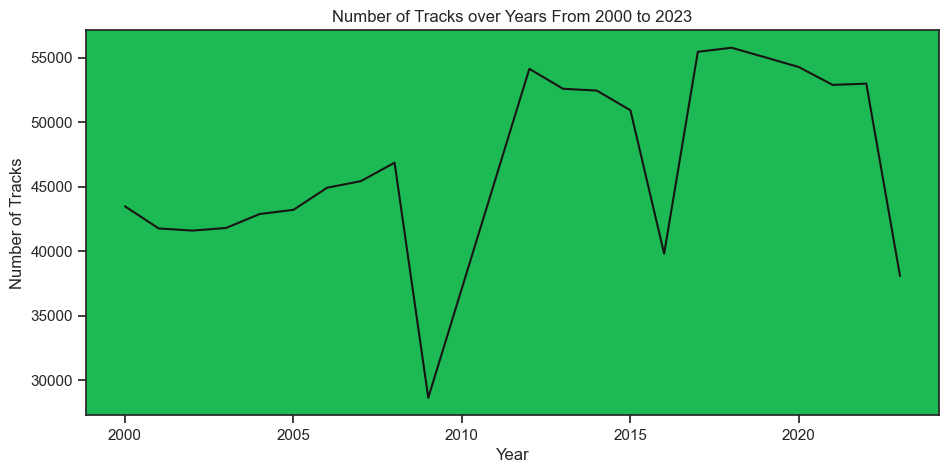

In [23]:
count_tracks = df.groupby(['year', 'track_id']).size().reset_index(name='Count')

track_count_per_year = count_tracks.groupby('year')['track_id'].nunique().reset_index(name='NumTracks')

print("Number of Tracks in Each Year:")
print(track_count_per_year)

Highest_year = track_count_per_year.loc[track_count_per_year['NumTracks'].idxmax(), 'year']
print("The year with the highest tracks released : ", Highest_year)

Lowest_year = track_count_per_year.loc[track_count_per_year['NumTracks'].idxmin(), 'year']
print("The year with the Lowest tracks released : ", Lowest_year)

plt.figure(figsize=(11, 5))
sns.set(style="ticks", rc={'axes.facecolor':'#1DB954'})
sns.lineplot(x='year', y='NumTracks', data=track_count_per_year, color='#191414')
plt.title('Number of Tracks over Years From 2000 to 2023')
plt.xlabel('Year')
plt.ylabel('Number of Tracks')
plt.show()


### 2-Number of artists released tracks over years

Number of Artists who released tracks in Each Year:
    year  NumArtists
0   2000        5857
1   2001        5759
2   2002        6035
3   2003        6094
4   2004        6600
5   2005        6869
6   2006        7241
7   2007        7723
8   2008        7993
9   2009        5302
10  2012        9561
11  2013        9799
12  2014       10271
13  2015       10289
14  2016        8975
15  2017       12343
16  2018       13143
17  2019       13821
18  2020       14190
19  2021       13835
20  2022       12722
21  2023       10987
The year with the highest number of Artists who released tracks  :  2020
The year with the lowest number of Artists who released tracks  :  2009


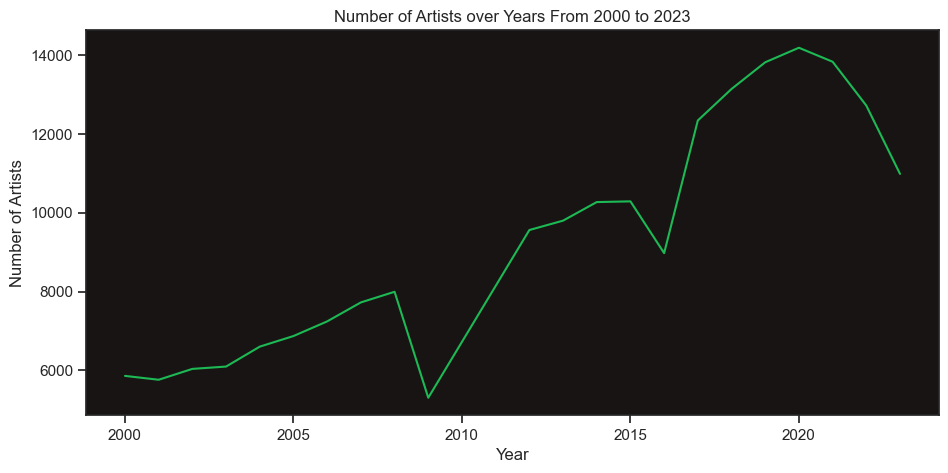

In [24]:
count_artists_releases = df.groupby(['year', 'artist_name']).size().reset_index(name='Count')

artist_count_per_year = count_artists_releases.groupby('year')['artist_name'].nunique().reset_index(name='NumArtists')

print("Number of Artists who released tracks in Each Year:")
print(artist_count_per_year)

Highest_year = artist_count_per_year.loc[artist_count_per_year['NumArtists'].idxmax(), 'year']
print("The year with the highest number of Artists who released tracks  : ", Highest_year)

Lowest_year = artist_count_per_year.loc[artist_count_per_year['NumArtists'].idxmin(), 'year']
print("The year with the lowest number of Artists who released tracks  : ", Lowest_year)

plt.figure(figsize=(11, 5))
sns.set(style="ticks", rc={'axes.facecolor':'#191414'})
sns.lineplot(x='year', y='NumArtists', data=artist_count_per_year, color="#1DB954")
plt.title('Number of Artists over Years From 2000 to 2023')
plt.xlabel('Year')
plt.ylabel('Number of Artists')
plt.show()


### 3-Number of Tracks in each Genre

Genre with the Highest Number of Tracks: gospel
Genre with the Lowest Number of Tracks: songwriter
             genre  NumTracksPerGenre
74      songwriter                575
63            rock               3040
18  detroit-techno               3575
22         dubstep               3747
8    chicago-house               4684
..             ...                ...
26             emo              19107
2         alt-rock              19174
3          ambient              19657
4      black-metal              19738
33          gospel              19749

[82 rows x 2 columns]
Top 10 Genres: 
          genre  NumTracksPerGenre
48        k-pop              17574
44       indian              17917
5         blues              18006
28        forro              18543
0      acoustic              19095
26          emo              19107
2      alt-rock              19174
3       ambient              19657
4   black-metal              19738
33       gospel              19749


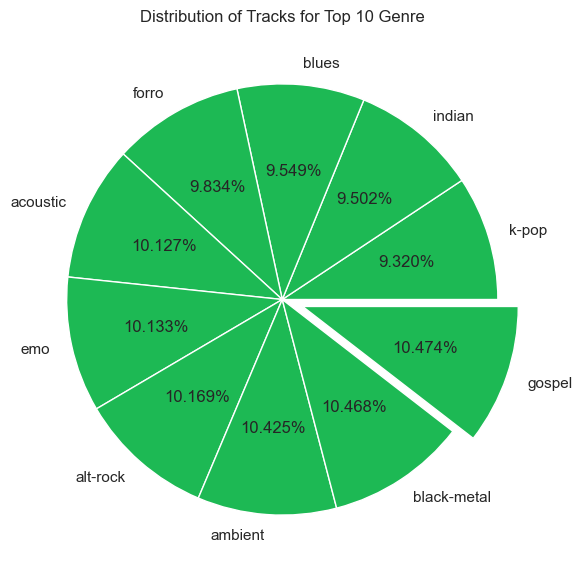

In [25]:
count_tracks_genres = df.groupby(['genre', 'track_id']).size().reset_index(name='track_genre_Count')

tracks_count_per_genre = count_tracks_genres.groupby('genre')['track_id'].nunique().reset_index(name='NumTracksPerGenre')



max_genre_tracks = tracks_count_per_genre.loc[tracks_count_per_genre['NumTracksPerGenre'].idxmax(), 'genre']
min_genre_tracks = tracks_count_per_genre.loc[tracks_count_per_genre['NumTracksPerGenre'].idxmin(), 'genre']
print("Genre with the Highest Number of Tracks:", max_genre_tracks)
print("Genre with the Lowest Number of Tracks:", min_genre_tracks)

tracks_count_per_genre = tracks_count_per_genre.sort_values(by = "NumTracksPerGenre",ascending=True)
print(tracks_count_per_genre)

top10_genres = tracks_count_per_genre[-10:]
print("Top 10 Genres: ")
print(top10_genres)

plt.figure(figsize=(12, 7))
colors = ['#1DB954','#1DB954','#1DB954','#1DB954','#1DB954','#1DB954','#1DB954','#1DB954','#1DB954','#1DB954']
explode = [0.1 if year == max_genre_tracks else 0 for year in top10_genres['genre']]
plt.pie(top10_genres['NumTracksPerGenre'], labels=top10_genres['genre'], autopct='%1.3f%%', explode=explode, colors=colors)
plt.title('Distribution of Tracks for Top 10 Genre')
plt.show()

### 4-Most popular tracks

                                   track_name                track_id  \
560200  Quevedo: Bzrp Music Sessions, Vol. 52  2tTmW7RDtMQtBk7m2rYeSw   
569187                              Anti-Hero  0V3wPSX9ygBnCm8psDIegu   
608232                                    OMG  65FftemJ1DbbZ45DUfHJXE   
569195                             La Bachata  5ww2BF9slyYgNOk37BlC4u   
569191          Calm Down (with Selena Gomez)  0WtM2NBVQNNJLh6scP13H8   
541577                        I'm Good (Blue)  4uUG5RXrOk84mYEfFvj3cK   
569184                              Kill Bill  1Qrg8KqiBpW07V7PNxwwwL   
612504                    Die For You - Remix  7oDd86yk8itslrA9HRP2ki   
605178  Shakira: Bzrp Music Sessions, Vol. 53  4nrPB8O7Y7wsOCJdgXkthe   
612503                                Flowers  0yLdNVWF3Srea0uzk55zFn   

        popularity  
560200          92  
569187          92  
608232          92  
569195          93  
569191          93  
541577          93  
569184          94  
612504          95  
605178 

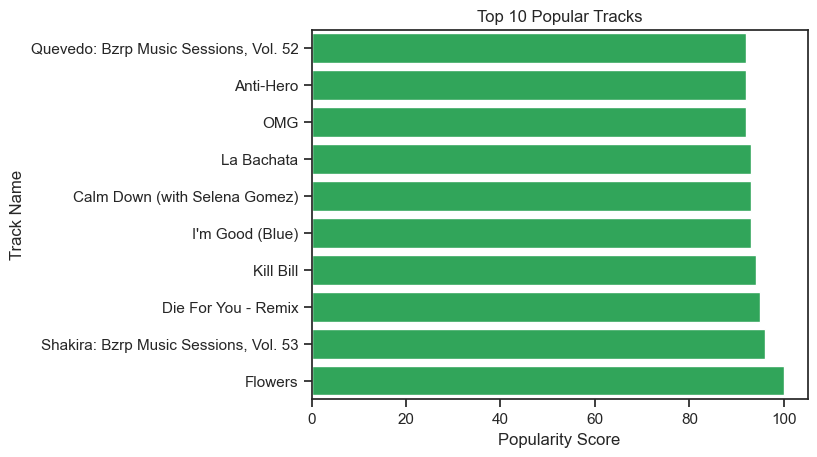

In [26]:
popularity_subset = df[['track_name','track_id','popularity']]
popularity_subset_sorted = popularity_subset.sort_values(by = "popularity",ascending=True)
top10_popular_track = popularity_subset_sorted[-10:]
print(top10_popular_track)

sns.set(style="ticks", rc={'axes.facecolor':'white'})
sns.barplot(x='popularity', y='track_name', data=top10_popular_track, color='#1DB954')
plt.title('Top 10 Popular Tracks')
plt.xlabel('Popularity Score')
plt.ylabel('Track Name')
plt.show()

### 5-Longest and shortest tracks 

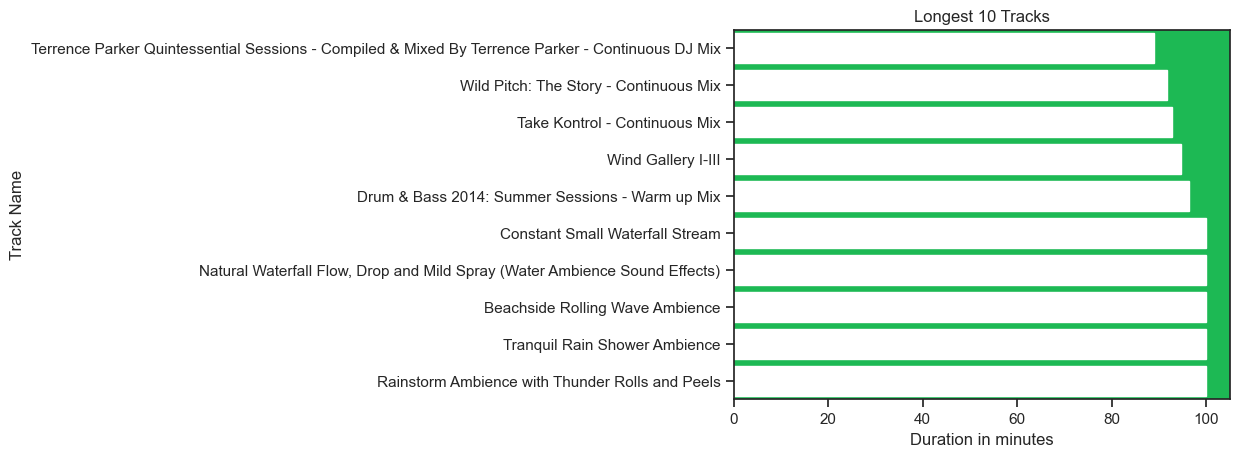

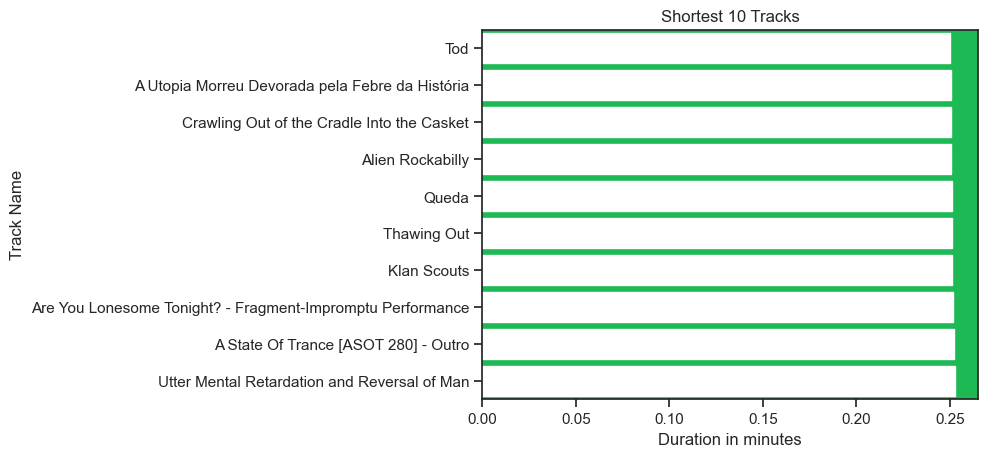

In [27]:
duration_subset = df[['track_name','track_id','duration_ms']]
duration_subset['duration_ms'] = duration_subset['duration_ms'] / 60000
duration_subset_sorted = duration_subset.sort_values(by = "duration_ms",ascending=True)
Longest10_tracks = duration_subset_sorted[-10:]
Shortest10_tracks = duration_subset_sorted[:10]

sns.set(style="ticks", rc={'axes.facecolor':'#1DB954'})
sns.barplot(x='duration_ms', y='track_name', data=Longest10_tracks, color='white')
plt.title('Longest 10 Tracks')
plt.xlabel('Duration in minutes')
plt.ylabel('Track Name')
plt.show()

sns.set(style="ticks", rc={'axes.facecolor':'#1DB954'})
sns.barplot(x='duration_ms', y='track_name', data=Shortest10_tracks, color='white')
plt.title('Shortest 10 Tracks')
plt.xlabel('Duration in minutes')
plt.ylabel('Track Name')
plt.show()


### 6-Top 10 artists: With highest Average pupularity tracks

          artist_name  popularity
7246             Joji      66.618
16529          j-hope      66.938
5209      Frank Ocean      67.880
10024   Morgan Wallen      68.213
1742    Billie Eilish      68.267
10945           Ozuna      68.680
12485             SZA      70.510
4930             Feid      71.895
11864  Rauw Alejandro      71.923
6039     Harry Styles      75.686


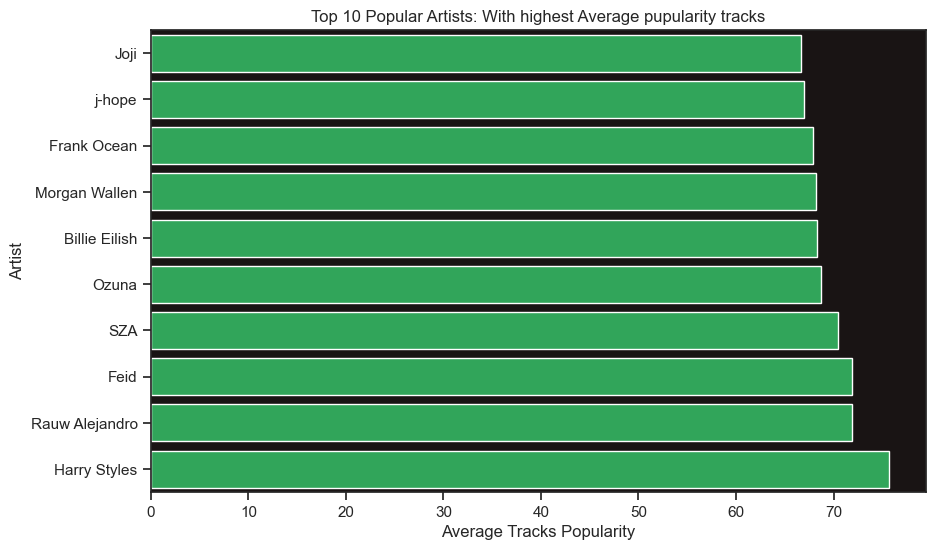

In [28]:
mean_number_of_songs = df['artist_name'].value_counts(ascending=False).mean()
top10_artists = df[df['artist_name'].map(df['artist_name'].value_counts()) >= int(mean_number_of_songs)]
top10_artists = top10_artists[['artist_name','track_name','popularity']]
top10_artists_average_popularity = top10_artists.groupby('artist_name')['popularity'].mean().reset_index()
top10_artists_average_popularity_sorted = top10_artists_average_popularity.sort_values(by = "popularity",ascending=True)
top10_artists_average_popularity_sorted = top10_artists_average_popularity_sorted[-10:]
print(top10_artists_average_popularity_sorted)

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.set(style="ticks", rc={'axes.facecolor':'#191414'})
sns.barplot(x='popularity', y='artist_name', data=top10_artists_average_popularity_sorted, color="#1DB954")

plt.title('Top 10 Popular Artists: With highest Average pupularity tracks')
plt.xlabel('Average Tracks Popularity')
plt.ylabel('Artist')

plt.show()


### 7-Top 10 Genres: With highest Average pupularity tracks

        genre  popularity
13    country      33.328
27       folk      33.697
45  indie-pop      35.906
66        sad      36.371
2    alt-rock      38.725
49      metal      39.809
14      dance      43.102
63       rock      46.181
42    hip-hop      46.689
56        pop      55.979


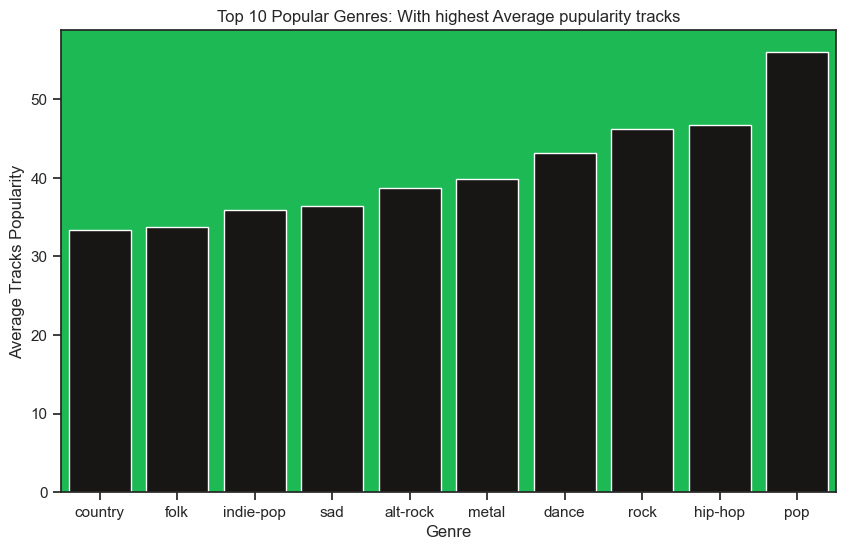

In [29]:
top10_genres = df[['genre','track_name','popularity']]
top10_genres_average_popularity = top10_genres.groupby('genre')['popularity'].mean().reset_index()
top10_genres_average_popularity_sorted = top10_genres_average_popularity.sort_values(by = "popularity",ascending=True)
top10_genres_average_popularity_sorted = top10_genres_average_popularity_sorted[-10:]
print(top10_genres_average_popularity_sorted)

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.set(style="ticks", rc={'axes.facecolor':'#1DB954'})
sns.barplot(x='genre', y='popularity', data=top10_genres_average_popularity_sorted, color="#191414")

plt.title('Top 10 Popular Genres: With highest Average pupularity tracks')
plt.xlabel('Genre')
plt.ylabel('Average Tracks Popularity')

plt.show()


### 8-Overall Loudness of tracks evolved over years

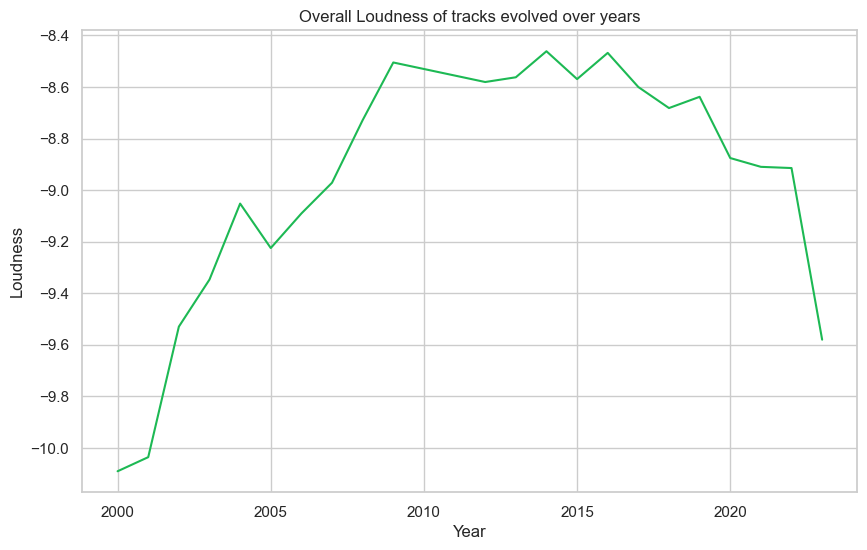

In [30]:
loudness_over_year = df[['year','track_name','loudness']]
loudness_over_year_avg = loudness_over_year.groupby('year')['loudness'].mean().reset_index()


sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

sns.lineplot(x='year', y='loudness', data=loudness_over_year_avg, color="#1DB954")

plt.title('Overall Loudness of tracks evolved over years')
plt.xlabel('Year')
plt.ylabel('Loudness')

plt.show()

### 9-Top 10 Loudness genres

            genre  loudness
35      grindcore    -5.900
38      hard-rock    -5.838
20  drum-and-bass    -5.397
41    heavy-metal    -5.369
16    death-metal    -5.309
61           punk    -5.308
39       hardcore    -5.185
50      metalcore    -4.871
49          metal    -4.847
40      hardstyle    -4.796


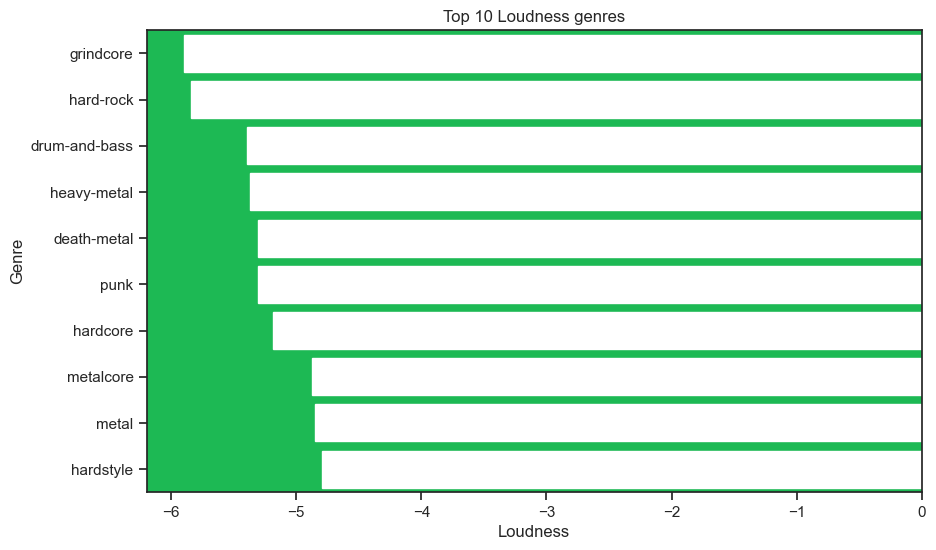

In [31]:
loudness_across_genres = df[['genre','track_name','loudness']]
loudness_across_genres_avg = loudness_across_genres.groupby('genre')['loudness'].mean().reset_index()
loudness_across_genres_avg = loudness_across_genres_avg.sort_values(by="loudness", ascending=True)

loudness_across_genres_avg_top10 = loudness_across_genres_avg[-10:]
print(loudness_across_genres_avg_top10)

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.set(style="ticks", rc={'axes.facecolor':'#1DB954'})
sns.barplot(x='loudness', y='genre', data=loudness_across_genres_avg_top10, color="white")

plt.title('Top 10 Loudness genres')
plt.xlabel('Loudness')
plt.ylabel('Genre')

plt.show()

### 10-Top 10 Danceability genres

             genre  danceability
6        breakbeat         0.679
19           disco         0.681
43           house         0.690
54           party         0.700
15       dancehall         0.712
42         hip-hop         0.718
18  detroit-techno         0.729
51  minimal-techno         0.732
17      deep-house         0.744
8    chicago-house         0.775


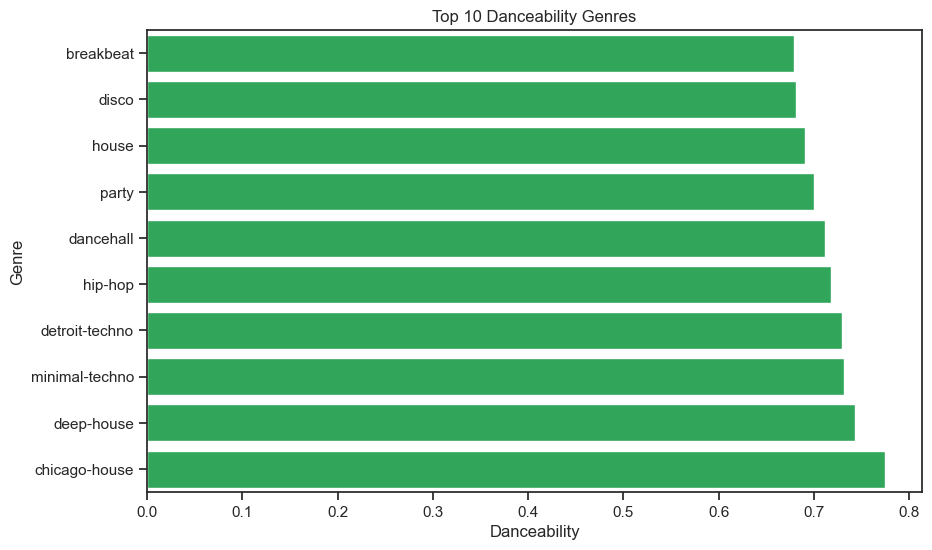

In [32]:
danceability_across_genres = df[['genre','track_name','danceability']]
danceability_across_genres_avg = danceability_across_genres.groupby('genre')['danceability'].mean().reset_index()
danceability_across_genres_avg = danceability_across_genres_avg.sort_values(by="danceability", ascending=True)

danceability_across_genres_avg_top10 = danceability_across_genres_avg[-10:]
print(danceability_across_genres_avg_top10)

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.set(style="ticks", rc={'axes.facecolor':'white'})
sns.barplot(x='danceability', y='genre', data=danceability_across_genres_avg_top10, color="#1DB954")

plt.title('Top 10 Danceability Genres')
plt.xlabel('Danceability')
plt.ylabel('Genre')

plt.show()

### 11-Overall Danceability of tracks evolved over years

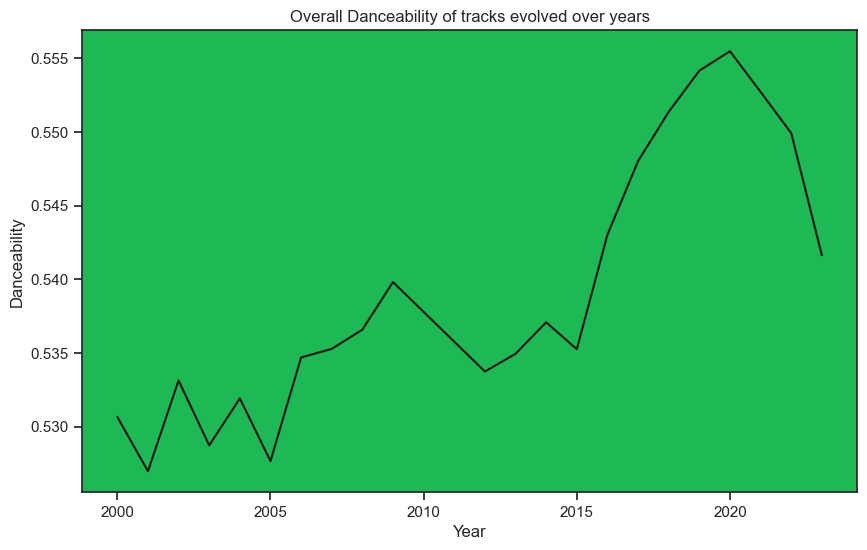

In [33]:
danceability_over_years = df[['year','track_name','danceability']]
danceability_over_years_avg = danceability_over_years.groupby('year')['danceability'].mean().reset_index()

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.set(style="ticks", rc={'axes.facecolor':'#1DB954'})
sns.lineplot(x='year', y='danceability', data=danceability_over_years_avg, color="#191414")

plt.title('Overall Danceability of tracks evolved over years')
plt.xlabel('Year')
plt.ylabel('Danceability')

plt.show()

### 12-Show the relation between the track duration and the track popularity score

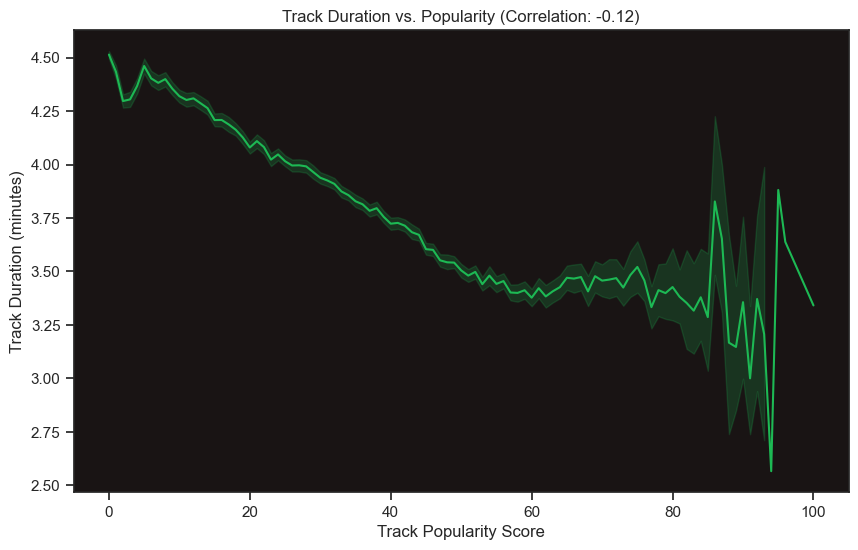

In [34]:
duration_vs_popularity = df[['track_name','duration_ms','popularity']]
duration_vs_popularity['duration_minutes'] = duration_vs_popularity['duration_ms'] / 60000

correlation = duration_vs_popularity['duration_minutes'].corr(duration_vs_popularity['popularity'])


plt.figure(figsize=(10, 6))
sns.set(style="ticks", rc={'axes.facecolor':'#191414'})
sns.lineplot(x='popularity', y='duration_minutes', data=duration_vs_popularity, color="#1DB954")
plt.title(f'Track Duration vs. Popularity (Correlation: {correlation:.2f})')
plt.xlabel('Track Popularity Score')
plt.ylabel('Track Duration (minutes)')
plt.show()



### 12-Top tracks in each genre

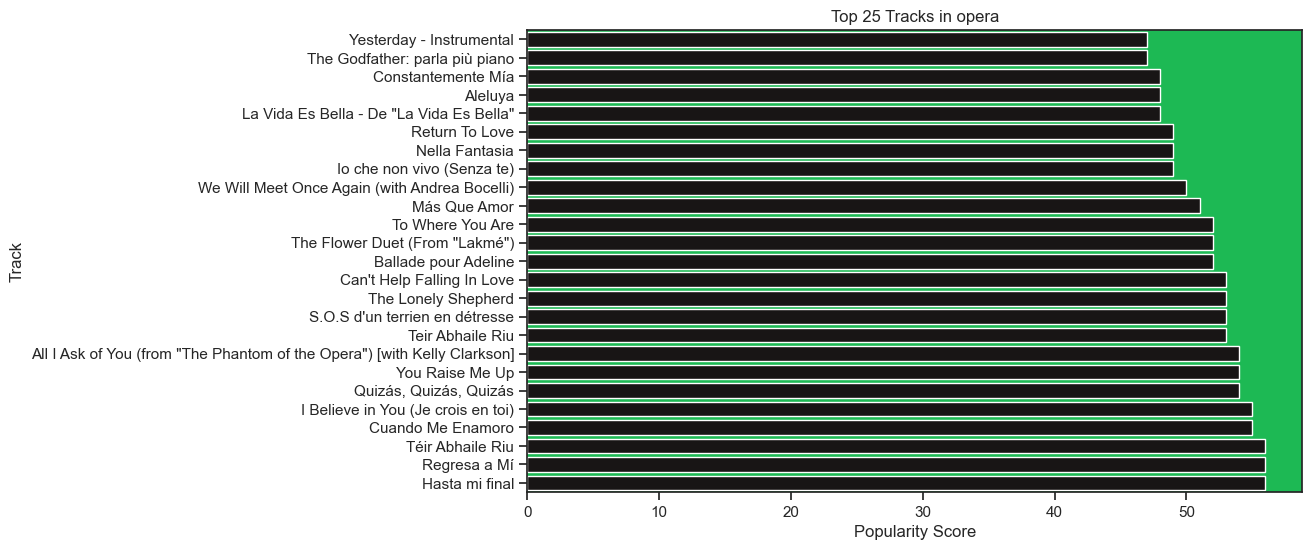

interactive(children=(Dropdown(description='genre_name', options=('opera', 'party', 'piano', 'pop', 'new-age',…

In [35]:
def get_top_per_genre(genre_name,num_of_tracks):
    top_tracks_in_each_genre = df[df['genre'] == genre_name]
    top_tracks_in_each_genre = top_tracks_in_each_genre[['track_name','popularity','artist_name']]
    top_tracks_in_each_genre = top_tracks_in_each_genre.sort_values(by="popularity", ascending=True)
    top10_tracks_in_each_genre = top_tracks_in_each_genre[-num_of_tracks:]
    
    sns.set(style="whitegrid")
    plt.figure(figsize=(10, 6))
    sns.set(style="ticks", rc={'axes.facecolor':'#1DB954', 'figure.facecolor':'lightgreen'})
    sns.barplot(x='popularity', y='track_name', data=top10_tracks_in_each_genre, color="#191414")
    plt.title(f'Top {num_of_tracks} Tracks in {genre_name}')
    plt.xlabel('Popularity Score')
    plt.ylabel('Track')

    plt.show()

interactive(get_top_per_genre, genre_name=list(df.genre.unique()), num_of_tracks=(1,50))

### 12-Top tracks for top 10 artists

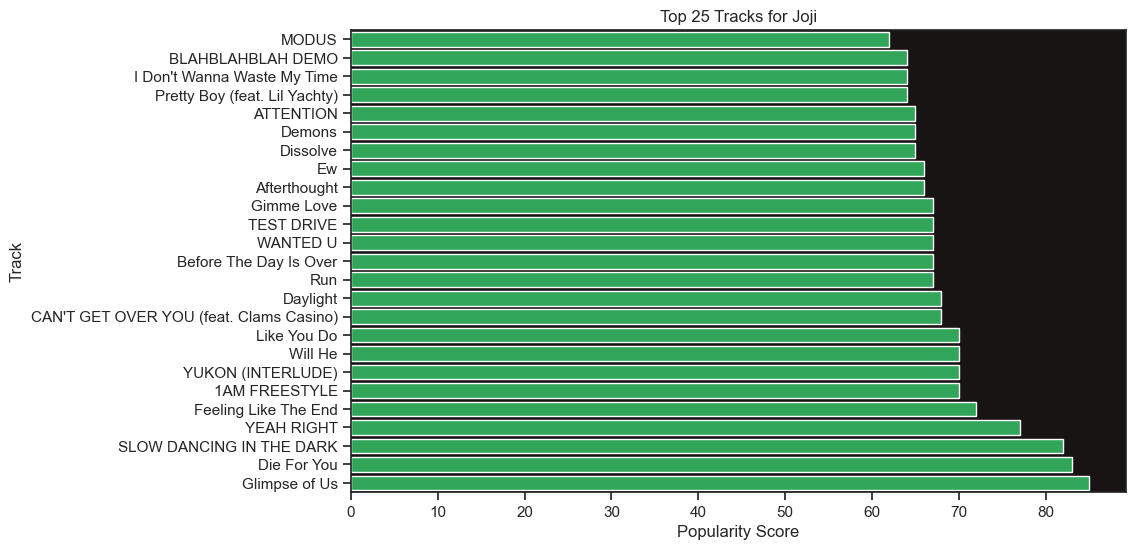

interactive(children=(Dropdown(description='artist_name', options=('Joji', 'j-hope', 'Frank Ocean', 'Morgan Wa…

In [36]:
def get_top_per_artist(artist_name,number_of_tracks):
    top_tracks_for_each_artist = df[df['artist_name'] == artist_name]
    top_tracks_for_each_artist = top_tracks_for_each_artist[['track_name','popularity']]
    top_tracks_for_each_artist = top_tracks_for_each_artist.sort_values(by="popularity", ascending=True)
    top10_tracks_for_each_artist = top_tracks_for_each_artist[-number_of_tracks:]
    
    sns.set(style="whitegrid")
    plt.figure(figsize=(10, 6))
    sns.set(style="ticks", rc={'axes.facecolor':'#191414', 'figure.facecolor':'lightgreen'})
    sns.barplot(x='popularity', y='track_name', data=top10_tracks_for_each_artist, color="#1DB954")
    plt.title(f'Top {number_of_tracks} Tracks for {artist_name}')
    plt.xlabel('Popularity Score')
    plt.ylabel('Track')

    plt.show()

interactive(get_top_per_artist, artist_name=list(top10_artists_average_popularity_sorted.artist_name.unique()), number_of_tracks=(1,50))
